In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import datetime
from pprint import pprint
%matplotlib inline

In [31]:
# build mementos on FP6program online

max_year = '2006'
min_year = '2002'

timemaps_structure = {}

for timemap_file in os.listdir('./mementos_all_with_url'):           
    with open('./mementos_all_with_url/' + timemap_file) as timemap:    
        timemap_json = json.load(timemap)                            
        original_uri = timemap_json['original_uri']        
        if timemap_json.get('mementos',0) != 0:
            all_mementos = timemap_json['mementos']['list']         
            accepted_mementos = []
            for memento in all_mementos:                
                date_string = memento['datetime']                
                date = datetime.datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%S%fZ")
                if (int(date.year) >= int(min_year) and int(date.year) <= int(max_year)):
                    accepted_mementos.append(memento)        
            timemaps_structure[original_uri] = accepted_mementos

In [34]:
iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:        
    if mementos == []:        
        count += 1        
print "Number of URIs with mementos, and without a valid archived version: %s" % count            

Number of URIs with mementos, and without a valid archived version: 934


In [33]:
memento

{u'datetime': u'2015-08-01T22:00:47Z',
 u'uri': u'http://web.archive.org/web/20150801220047/http://momocs.org/'}

In [7]:
# Mementos frequency distribution
timemaps_frequency = {}

iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:    
    if mementos != []:
        timemaps_frequency[uri] = len(mementos)
#print "Number of URIs without any version archived: %s" % count 

In [9]:
from urlparse import urlparse
import re

domains = []

iterator = timemaps_structure.iteritems()
domains_not_archived = []
domains_archived = []
for uri,mementos in iterator:    
    if mementos == []:
        url = urlparse(uri)
        url_parsed = url.netloc.split('.')
        domains_not_archived.append(url_parsed[len(url_parsed) - 1])
    else:
        url = urlparse(uri)
        url_parsed = url.netloc.split('.')
        domains_archived.append(url_parsed[len(url_parsed) - 1])
#print "Number of URIs without any version archived: %s" % count 

In [10]:
from collections import Counter
counter_not_archived = Counter(domains_not_archived)
counter_archived = Counter(domains_archived)

In [11]:
counter_not_archived

Counter({u'11': 1,
         u'at': 8,
         u'be': 13,
         u'bg': 2,
         u'biz': 1,
         u'cat': 1,
         u'ch': 10,
         u'com': 82,
         u'cy': 1,
         u'cz': 1,
         u'de': 38,
         u'dk': 5,
         u'edu': 7,
         u'ee': 2,
         u'es': 14,
         u'eu': 266,
         u'fi': 7,
         u'fr': 17,
         u'gov': 1,
         u'gr': 21,
         u'hr': 1,
         u'hu': 6,
         u'ie': 11,
         u'il': 2,
         u'info': 14,
         u'is': 1,
         u'it': 25,
         u'lt': 1,
         u'lv': 1,
         u'net': 49,
         u'nl': 14,
         u'no': 7,
         u'nu': 1,
         u'org': 221,
         u'pl': 13,
         u'pt': 4,
         u'ro': 3,
         u'se': 13,
         u'si': 2,
         u'sk': 1,
         u'tr': 3,
         u'tv': 1,
         u'uk': 42})

In [12]:
counter_archived

Counter({u'66': 1,
         u'at': 8,
         u'be': 5,
         u'bg': 2,
         u'cc': 2,
         u'ch': 8,
         u'com': 80,
         u'cz': 3,
         u'de': 58,
         u'dk': 7,
         u'edu': 6,
         u'ee': 2,
         u'es': 9,
         u'eu': 38,
         u'fi': 10,
         u'fr': 30,
         u'fr:9098': 1,
         u'gr': 12,
         u'hu': 3,
         u'ie': 13,
         u'il': 4,
         u'info': 21,
         u'int': 4,
         u'it': 19,
         u'lv': 2,
         u'mt': 1,
         u'net': 96,
         u'nl': 13,
         u'no': 3,
         u'org': 387,
         u'org:8080': 1,
         u'pl': 18,
         u'pt': 6,
         u'ru': 1,
         u'se': 11,
         u'sk': 1,
         u'uk': 32})

In [13]:
counter_not_archived['eu'] / 178.

1.4943820224719102

# Web Archives Distribution

In [14]:
# Mementos frequency distribution
list_mementos = []

iterator = timemaps_structure.iteritems()
count = 0
for uri,mementos in iterator:    
    if mementos != []:
        for m in mementos:
            list_mementos.append(m)
#print "Number of URIs without any version archived: %s" % count 

In [15]:
web_archives = []
for memento in list_mementos:
    web_archives.append(memento['uri'].split('/')[2])

web_archives_distribution = Counter(web_archives)    

In [16]:
web_archives_distribution

Counter({u'arquivo.pt': 30,
         u'wayback.vefsafn.is': 3,
         u'web.archive.bibalex.org:80': 9576,
         u'web.archive.org': 17619,
         u'webarchive.loc.gov': 55})

In [17]:
len(list_mementos)

27283

([<matplotlib.axis.XTick at 0x7f61ae757590>,
 <a list of 5 Text xticklabel objects>)

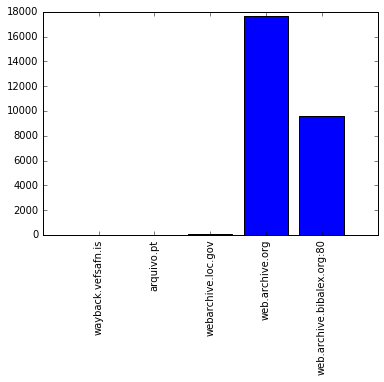

In [19]:
plt.bar(range(len(web_archives_distribution)), web_archives_distribution.values(), align='center',)
plt.xticks(range(len(web_archives_distribution)), web_archives_distribution.keys(),  rotation='vertical')

In [20]:
9032/9961.

0.9067362714586888

# FP6 Archvived versions location distribution

In [22]:
iterator = timemaps_structure.iteritems()
count = 0
rows_list = []
for uri,mementos in iterator:     
    if mementos != []:        
        dictrcow = {}    
        dictrow['URI-O'] = uri
        for m in mementos:        
            dictrow[m['uri'].split('/')[2]] = 1
        rows_list.append(dictrow)

In [27]:
df = pd.DataFrame(rows_list)
df.count() 

URI-O                         918
arquivo.pt                      6
wayback.vefsafn.is              2
web.archive.bibalex.org:80    526
web.archive.org               910
webarchive.loc.gov             14
dtype: int64

In [36]:
df.count() / 2401 * 100

URI-O                         38.234069
arquivo.pt                     0.249896
wayback.vefsafn.is             0.083299
web.archive.bibalex.org:80    21.907539
web.archive.org               37.900875
webarchive.loc.gov             0.583090
dtype: float64